6.690444459069258445298167270465228284592740237712860107421875E-7


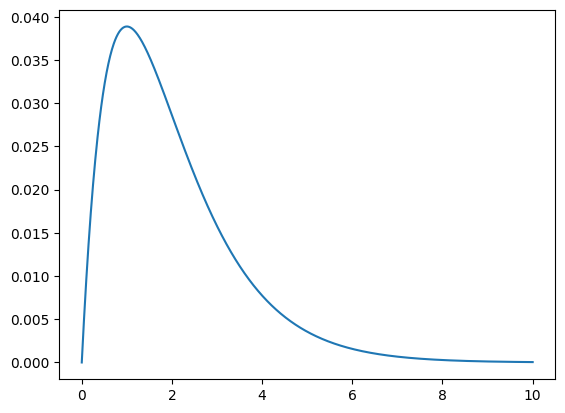

In [1]:
import math as m
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from decimal import Decimal
%matplotlib inline

def F(u,x,E) :
    out = -2*u*(1/x+E)
    return out 

def Verlet(E) : 
# Verlet algorithm to solve the radial Schrodinger's equation
# step size = 0.01
# r_max = 10
    h = 0.01
    r = np.linspace(0,10,1001)
    u = np.zeros((1,1001))

    # define u(r_max) and u(r_max - h) by asymptotic wavefunction 
    u[0,1000] = np.exp(-10)
    u[0,999] = np.exp(-10+0.01)

    for ele in range(3,1002) :
        u[0,-ele] = 2*u[0,-(ele-1)] - u[0,-(ele-2)] + F(u[0,-(ele-1)], r[-(ele-1)], E)*h**2
    return r,u[0,:]
r, u = Verlet(-0.5)
plt.plot(r,u)
print(Decimal(u[0]))

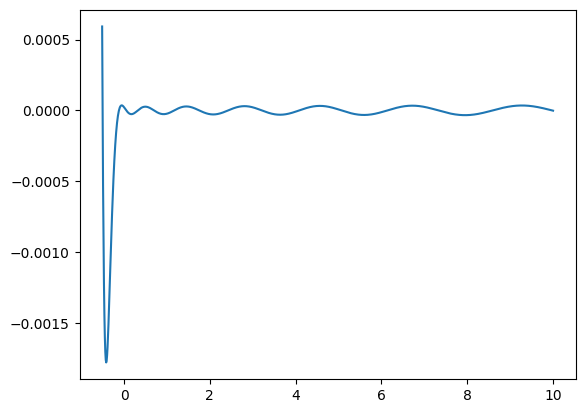

In [32]:
# Using Newton-Raphson method to find the value E which satisfies the boundary condition at r = 0 : u(0) = 0

# Graph u(0)(E) to navigate the monotonic region of u(0)'
E = np.linspace(-0.51,10,1001)

x0 = np.zeros((1,1001))

for ele in range(1001) : 
    x0[0,ele] = Verlet(E[ele])[1][0]

plt.plot(E,x0[0])
    
    

In [4]:
def Newton(n,E) :
    d = (Verlet(E+0.001)[1][0]-Verlet(E)[1][0])/0.001

    for ele in range(n) : 
        E = E - Verlet(E)[1][0]/d
    return E

print(Newton(20,-0.55))
print(Newton(20,-0.48))

-0.49998800854842385
-0.4999872213567572


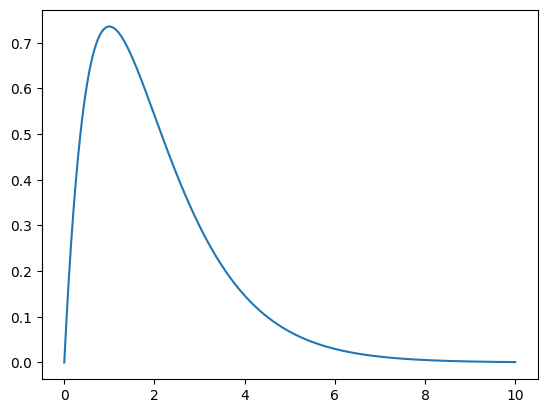

In [5]:
# Normalization check
r, u = Verlet(-0.5)
I = 0
for ele in u :
    I = I + (ele**2)*0.01
u = u/np.sqrt(I)
plt.plot(r,u)



In [6]:
# evaluate total charge 
q = 0
for ele in u :
    q = q + (ele**2)*0.01
q


0.999999999999999

1.0001159772370163

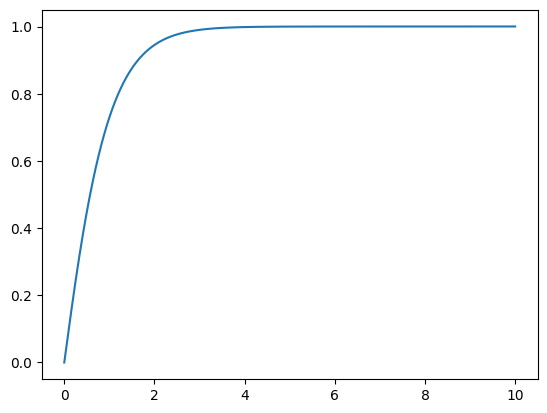

In [12]:
def G(u,r) :
    out = -u**2/r
    return out 

def Verlet2(u,a) : 
# Verlet algorithm to solve the Hartree potential
# step size = 0.01
# r_max = 10
    h = 0.01
    r = np.linspace(0,10,1001)
    U = np.zeros((1,1001))

    U[0,0] = 0
    U[0,1] = 0.01

    for ele in range(2,1001) :
        U[0,ele] = 2*U[0,(ele-1)] - U[0,(ele-2)] + G(u[(ele-1)], r[(ele-1)])*h**2 

    U[0,:] = U[0,:] + a*r
    return r,U[0,:]
r, U = Verlet2(u,0)
plt.plot(r,U)
U[-1]

-1.1597723701628482e-05


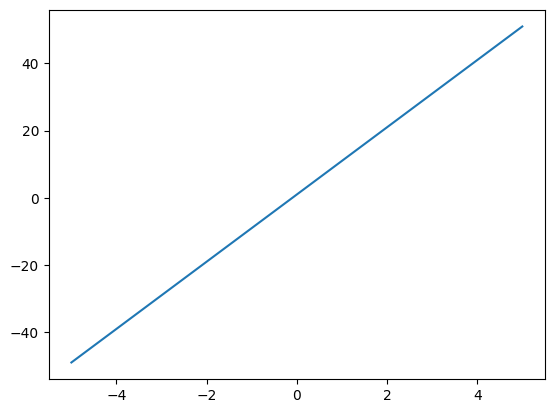

In [10]:
# Using Newton-Raphson method to find the value a which satisfies the boundary condition at r = \infty : U(r_max) = q_max

# Graph q_max(a) to navigate the monotonic region of q_max'(a)
a = np.linspace(-5,5,101)

q_max = np.zeros((1,101))

for ele in range(101) : 
    q_max[0,ele] = Verlet2(u,a[ele])[1][-1]

plt.plot(a,q_max[0])

def Newton2(n,a) :
    d = (Verlet2(u,a+0.001)[1][-1]-Verlet2(u,a)[1][-1])/0.001

    for ele in range(n) : 
        a = a - (Verlet2(u,a)[1][-1]-1)/d
    return a

print(Newton2(10,20))
